Complete the exercises below For **Assignment #3**.

## Linear model with one numerical variable

Execute the following cell to load the [ISLR2](https://cran.rstudio.com/web/packages/ISLR2/index.html) and [Tidverse](https://www.tidyverse.org/) packages.

In [1]:
library('tidyverse')
library('ISLR2')

Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


The `ISLR2` package provides a dataset called `Boston` that we will use in this assignment.

In [2]:
Boston |> head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7


🚨 Use the **Jupyter Lab Contextual Help Feature** to see the documentation for this data. 

❓ **In the markdown cell below, add definitions for the `lstat` and `medv` variables in the `Boston` data.** 

- `lstat`: *lower status of the population (percent).*
- `medv`: *median value of owner-occupied homes in $1000s.*

In [4]:
?Boston

Boston {ISLR2},R Documentation


Let's plot `medv` (y-axis) versus `lstat`.

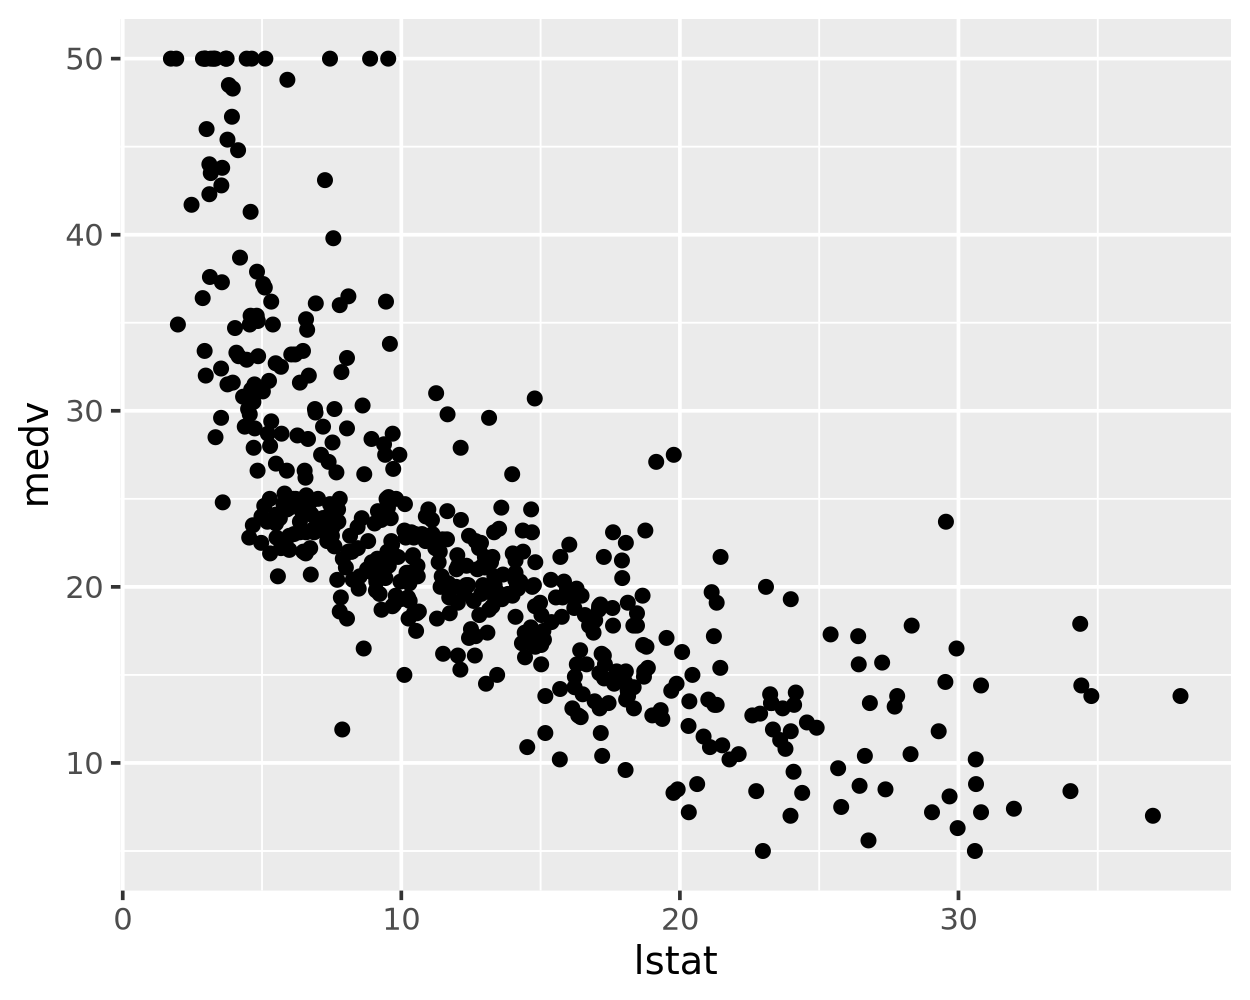

In [11]:
p = ggplot(Boston, aes(x = lstat, y = medv)) + geom_point()

p

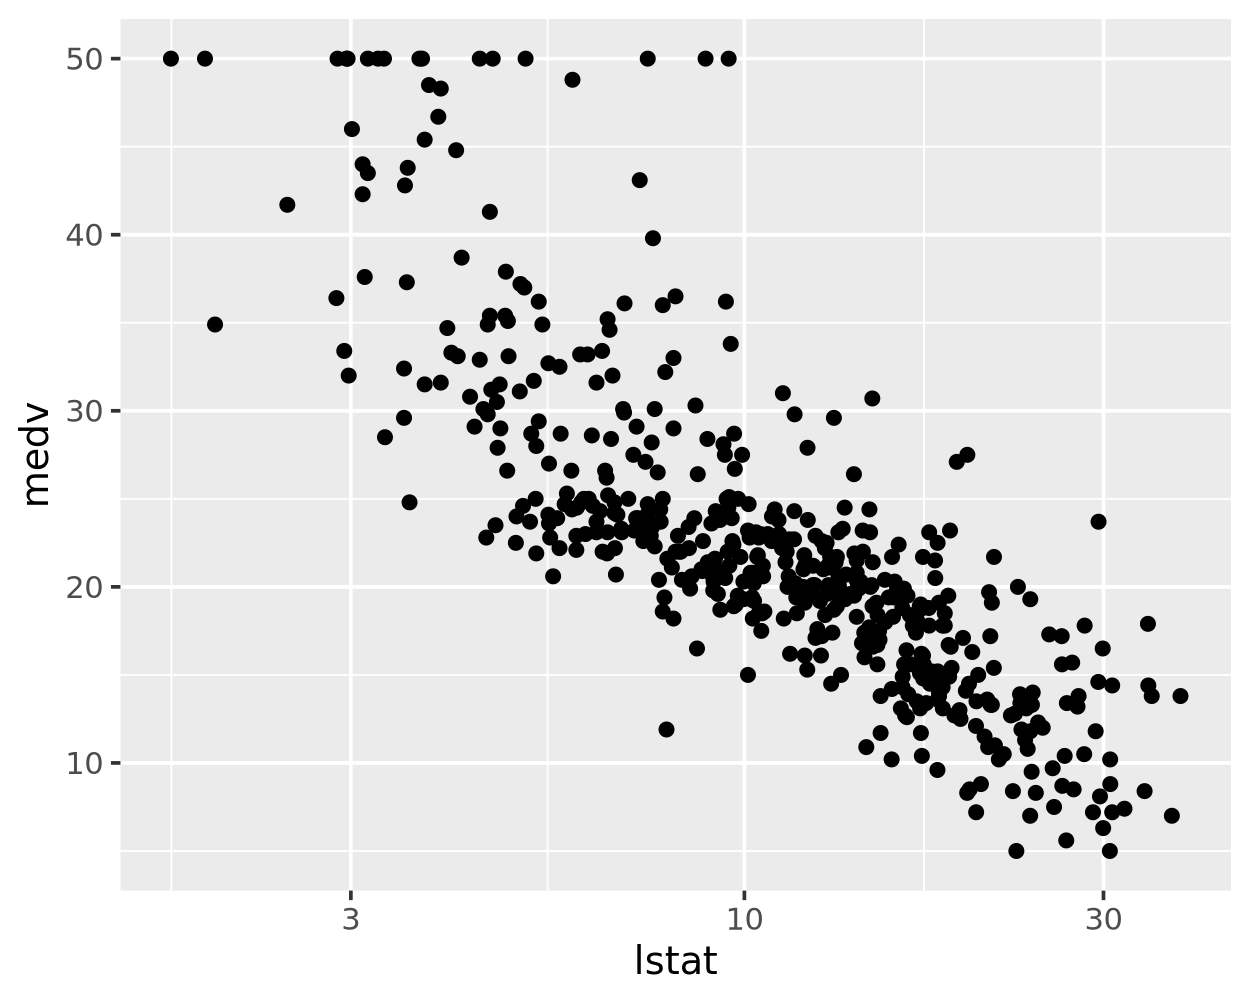

In [12]:
p = ggplot(Boston, aes(x = lstat, y = medv)) + geom_point() + scale_x_log10()

p

❓Does the relationship appear to be positive or negative? Does it look to be reasonably linear?

**Answer:**


The relationship appears to have a negative correlation. It does look to be broadly linear 
but is probably better modelled with a x scale in log10 scale.



### Let's build a model!

We need to first load the [Tidymodels]() package.

In [4]:
library('tidymodels')

── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──

✔ broom        1.0.9     ✔ rsample      1.3.1
✔ dials        1.4.1     ✔ tune         1.3.0
✔ infer        1.0.9     ✔ workflows    1.2.0
✔ modeldata    1.5.0     ✔ workflowsets 1.1.1
✔ parsnip      1.3.2     ✔ yardstick    1.3.2
✔ recipes      1.3.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()



In [5]:
mod = linear_reg() |> set_engine("lm")

mod

Linear Regression Model Specification (regression)

Computational engine: lm 


First we specify our model as `linear regression` using the `lm` engine.

Next we "fit" our model by supplying the `formula` and the data.

In [6]:
mod_fit = mod |> fit(medv ~ lstat, data = Boston)

mod_fit

parsnip model object


Call:
stats::lm(formula = medv ~ lstat, data = data)

Coefficients:
(Intercept)        lstat  
      34.55        -0.95  


### Get the regression table

In [7]:
# We can use the tidy function to get a table of our model information
tidy(mod_fit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),34.5538409,0.56262735,61.41515,3.743081e-236
lstat,-0.9500494,0.03873342,-24.52790,5.081103e-88


❓Comparing on the chart above and the regression table, does the **sign** of the `estimate` for the `lstat` term coefficient fit your expectations?

**Answer:**

Yes, the estimated lstat term has the expected sign since we are seeing a negative correlation that is better modelled with a log scale for x. The lstat number (x) is coefficient for an exponent (e^x).

### Making predictions and visualizing the model

We can use the `augment` function to "predict" `medv` for all the values in our original dataset. We will capture these predictions in a new data frame called `Boston2`. The predicted values are found in the `.pred` column.

In [8]:

Boston2 = augment(mod_fit, Boston)
glimpse(Boston2)

Rows: 506
Columns: 15
$ .pred   <dbl> 29.822595, 25.870390, 30.725142, 31.760696, 29.490078, 29.6040…
$ .resid  <dbl> -5.8225951, -4.2703898, 3.9748580, 1.6393042, 6.7099222, -0.90…
$ crim    <dbl> 0.00632, 0.02731, 0.02729, 0.03237, 0.06905, 0.02985, 0.08829,…
$ zn      <dbl> 18.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.5, 12.5, 12.5, 12.5, 12.5, 1…
$ indus   <dbl> 2.31, 7.07, 7.07, 2.18, 2.18, 2.18, 7.87, 7.87, 7.87, 7.87, 7.…
$ chas    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ nox     <dbl> 0.538, 0.469, 0.469, 0.458, 0.458, 0.458, 0.524, 0.524, 0.524,…
$ rm      <dbl> 6.575, 6.421, 7.185, 6.998, 7.147, 6.430, 6.012, 6.172, 5.631,…
$ age     <dbl> 65.2, 78.9, 61.1, 45.8, 54.2, 58.7, 66.6, 96.1, 100.0, 85.9, 9…
$ dis     <dbl> 4.0900, 4.9671, 4.9671, 6.0622, 6.0622, 6.0622, 5.5605, 5.9505…
$ rad     <int> 1, 2, 2, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4,…
$ tax     <dbl> 296, 242, 242, 222, 222, 222, 311, 311, 311, 311, 311, 311, 31…
$ ptratio <dbl> 15

Let's visualize our model.

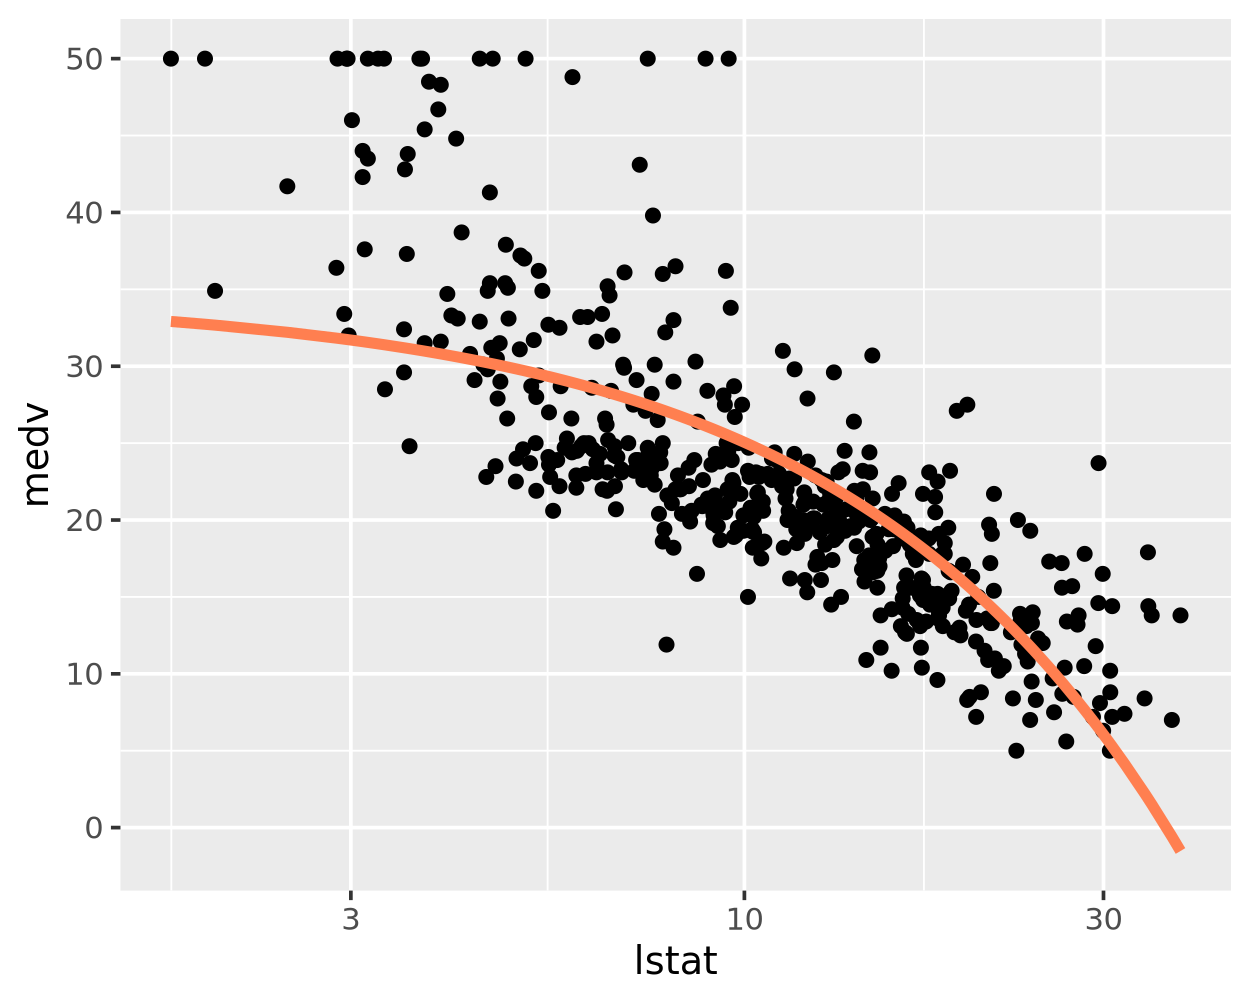

In [13]:
p = ggplot(Boston2, aes(x = lstat)) +
    geom_point(aes(y = medv)) + 
    scale_x_log10() +
    geom_line(aes(y = .pred), color = 'coral', linewidth = 1.5)

p

### Put your skills to practice independently!

In cells below, build a model of `medv` with the `rm` variable as a predictor.

**Include the following:**
- Show a regression table of your model parameters.
- Visualize the model with `ggplot2`.

In [10]:
mod_fit2 = mod |> fit(medv ~ rm, data = Boston)

mod_fit2






parsnip model object


Call:
stats::lm(formula = medv ~ rm, data = data)

Coefficients:
(Intercept)           rm  
    -34.671        9.102  


In [24]:
tidy(mod_fit2)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-34.670621,2.6498030,-13.08423,6.950229e-34
rm,9.102109,0.4190266,21.72203,2.487229e-74


In [25]:
Boston3 = augment(mod_fit2, Boston)
glimpse(Boston3)

Rows: 506
Columns: 15
$ .pred   <dbl> 25.17575, 23.77402, 30.72803, 29.02594, 30.38215, 23.85594, 20…
$ .resid  <dbl> -1.1757458, -2.1740210, 3.9719677, 4.3740621, 5.8178479, 4.844…
$ crim    <dbl> 0.00632, 0.02731, 0.02729, 0.03237, 0.06905, 0.02985, 0.08829,…
$ zn      <dbl> 18.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.5, 12.5, 12.5, 12.5, 12.5, 1…
$ indus   <dbl> 2.31, 7.07, 7.07, 2.18, 2.18, 2.18, 7.87, 7.87, 7.87, 7.87, 7.…
$ chas    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ nox     <dbl> 0.538, 0.469, 0.469, 0.458, 0.458, 0.458, 0.524, 0.524, 0.524,…
$ rm      <dbl> 6.575, 6.421, 7.185, 6.998, 7.147, 6.430, 6.012, 6.172, 5.631,…
$ age     <dbl> 65.2, 78.9, 61.1, 45.8, 54.2, 58.7, 66.6, 96.1, 100.0, 85.9, 9…
$ dis     <dbl> 4.0900, 4.9671, 4.9671, 6.0622, 6.0622, 6.0622, 5.5605, 5.9505…
$ rad     <int> 1, 2, 2, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4,…
$ tax     <dbl> 296, 242, 242, 222, 222, 222, 311, 311, 311, 311, 311, 311, 31…
$ ptratio <dbl> 15

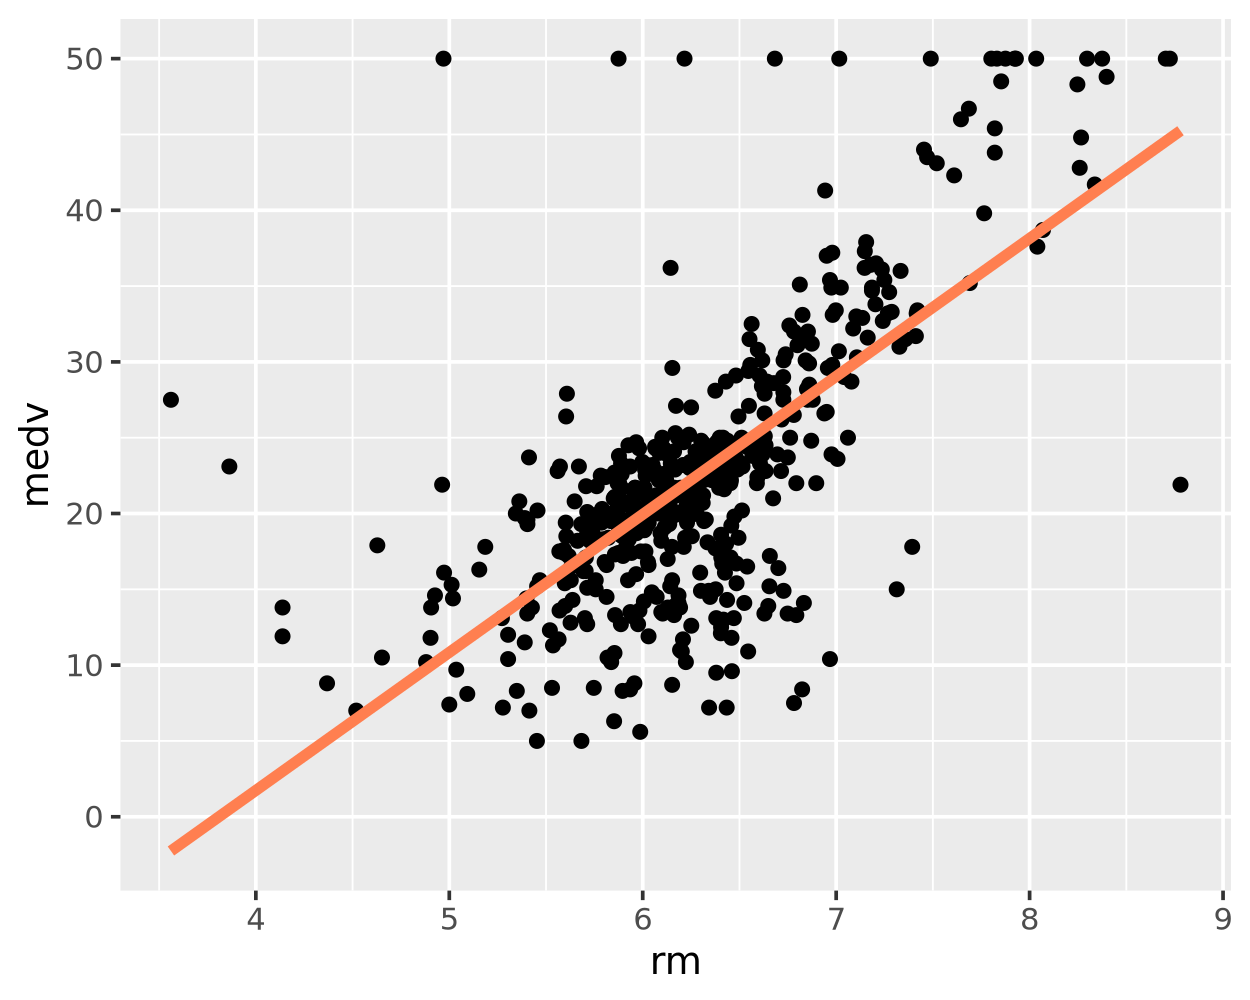

In [26]:

l = ggplot(Boston3, aes(x = rm)) +
    geom_point(aes(y = medv)) + 
    geom_line(aes(y = .pred), color = 'coral', linewidth = 1.5)
l

❓Does your model indicate a positive relationship beteen number of rooms and home value? 

**Answer:**

Yes, the plot helps visualize the positive relationship between the number of rooms
and the median home value.

## Linear model with one categorical variable

We will use the `Carseats` data from the `ISLR2` package for the following exercise.

In [27]:
Carseats |> glimpse()

Rows: 400
Columns: 11
$ Sales       <dbl> 9.50, 11.22, 10.06, 7.40, 4.15, 10.81, 6.63, 11.85, 6.54, …
$ CompPrice   <dbl> 138, 111, 113, 117, 141, 124, 115, 136, 132, 132, 121, 117…
$ Income      <dbl> 73, 48, 35, 100, 64, 113, 105, 81, 110, 113, 78, 94, 35, 2…
$ Advertising <dbl> 11, 16, 10, 4, 3, 13, 0, 15, 0, 0, 9, 4, 2, 11, 11, 5, 0, …
$ Population  <dbl> 276, 260, 269, 466, 340, 501, 45, 425, 108, 131, 150, 503,…
$ Price       <dbl> 120, 83, 80, 97, 128, 72, 108, 120, 124, 124, 100, 94, 136…
$ ShelveLoc   <fct> Bad, Good, Medium, Medium, Bad, Bad, Medium, Good, Medium,…
$ Age         <dbl> 42, 65, 59, 55, 38, 78, 71, 67, 76, 76, 26, 50, 62, 53, 52…
$ Education   <dbl> 17, 10, 12, 14, 13, 16, 15, 10, 10, 17, 10, 13, 18, 18, 18…
$ Urban       <fct> Yes, Yes, Yes, Yes, Yes, No, Yes, Yes, No, No, No, Yes, Ye…
$ US          <fct> Yes, Yes, Yes, Yes, No, Yes, No, Yes, No, Yes, Yes, Yes, N…


Below is a plot of `sales` versus `ShelveLoc`.

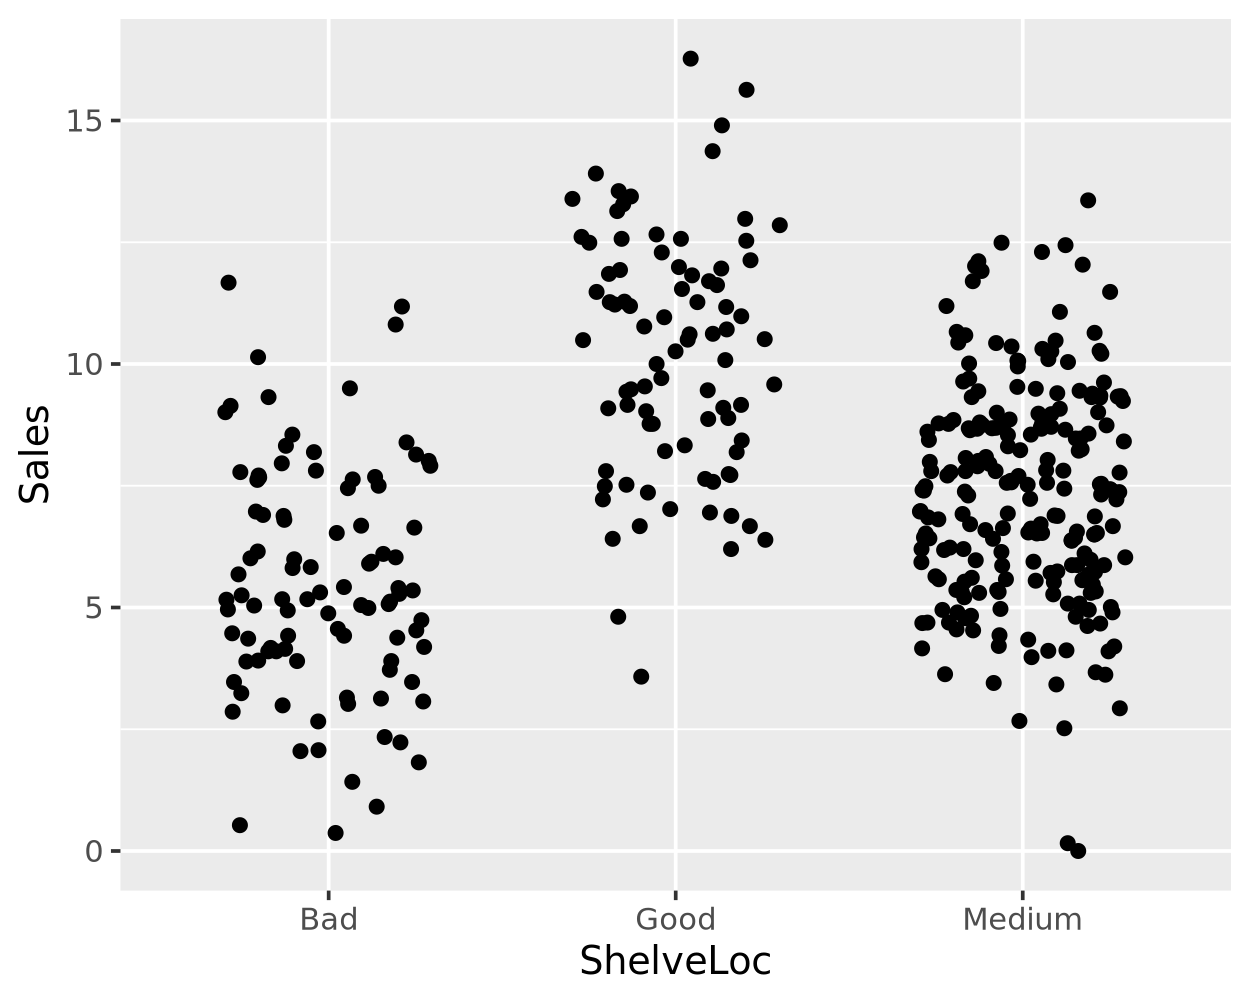

In [28]:

p = ggplot(Carseats, aes(x = ShelveLoc, y = Sales)) + 
    geom_point(position = position_jitter(width = 0.3, height = 0))
p

❓Does it look like a "Good" shelf location is associated with more car seat sales?

**Answer:**

Yes, the scatter plot data shows a trend that the average sales is higher with a "Good" ShelveLoc

In cells below, using the `Carseats` data build a model of `Sales` with the `ShelveLoc` variable as a predictor.

**Include the following:**
- Show a regression table of your model parameters.
- Visualize the model with `ggplot2`.

📊 *Here is some example code for plotting your model.*

In [15]:
``` r
# The code below assumes your predictions column is called ".pred" and is in a
# data frame called "Carseats2"

ggplot(Carseats2, aes(x = ShelveLoc)) + 
    geom_point(aes(y = Sales), 
               na.rm = T, position = position_jitter(height = 0, width = 0.2, seed = 42)) +
    geom_crossbar(aes(y = .pred, ymin = .pred, ymax = .pred), 
                  color = 'coral')

```

ERROR: Error in parse(text = input): attempt to use zero-length variable name


In [17]:
mod_fit4 = mod |> fit(Sales ~ ShelveLoc, data = Carseats)

mod_fit4




parsnip model object


Call:
stats::lm(formula = Sales ~ ShelveLoc, data = data)

Coefficients:
    (Intercept)    ShelveLocGood  ShelveLocMedium  
          5.523            4.691            1.784  


In [32]:
#mod_fit5 = mod |> fit(Sales ~ ShelveLoc, data = Carseats)

#mod_fit5


In [18]:
tidy(mod_fit4)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),5.522917,0.2387665,23.131038,1.408290e-75
ShelveLocGood,4.691083,0.3484201,13.463872,2.678712e-34
ShelveLocMedium,1.783659,0.2863562,6.228811,1.198905e-09


In [25]:
tidy(mod_fit5)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),5.522917,0.2387665,23.131038,1.408290e-75
ShelveLocGood,4.691083,0.3484201,13.463872,2.678712e-34
ShelveLocMedium,1.783659,0.2863562,6.228811,1.198905e-09


In [20]:
sale_prediction = augment(mod_fit4, Carseats)
tidy(sale_prediction)

Warning message:
“Data frame tidiers are deprecated and will be removed in an upcoming release of broom.”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”


ERROR: Error in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm): Calling var(x) on a factor x is defunct.
  Use something like 'all(duplicated(x)[-1L])' to test for a constant vector.


In [28]:
sample_data = data.frame (
    ShelveLoc = c('Bad', 'Good', 'Medium')
    )
sale_pred = augment(mod_fit4, new_data = sample_data)
#sale_pred1 = augment(mod_fit5, Carseats)
sale_pred

.pred,ShelveLoc
<dbl>,<chr>
5.522917,Bad
10.214000,Good
7.306575,Medium


In [36]:
mod_fit5 = mod |> fit(Sales ~ ShelveLoc, data = Carseats)
mod_fit5
sale_pred1 = augment(mod_fit5, Carseats)
sale_pred1


parsnip model object


Call:
stats::lm(formula = Sales ~ ShelveLoc, data = data)

Coefficients:
    (Intercept)    ShelveLocGood  ShelveLocMedium  
          5.523            4.691            1.784  


.pred,.resid,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>
5.522917,3.97708333,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
10.214000,1.00600000,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
7.306575,2.75342466,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
7.306575,0.09342466,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5.522917,-1.37291667,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5.522917,5.28708333,10.81,124,113,13,501,72,Bad,78,16,No,Yes
7.306575,-0.67657534,6.63,115,105,0,45,108,Medium,71,15,Yes,No
10.214000,1.63600000,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
7.306575,-0.76657534,6.54,132,110,0,108,124,Medium,76,10,No,No


In [35]:
#sale_pred1

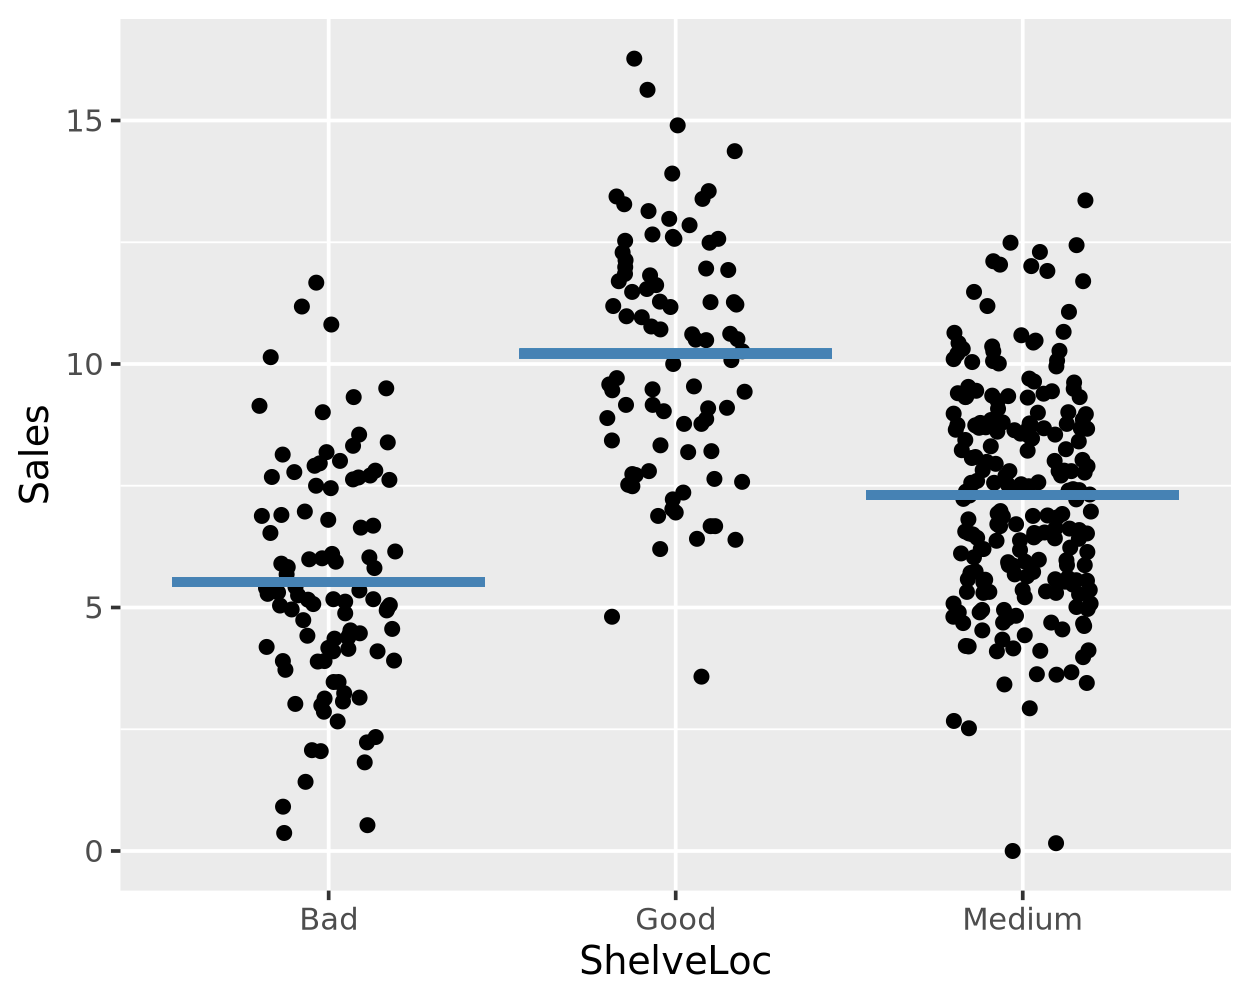

In [39]:
p = ggplot(Carseats) +
    geom_point(aes(x = ShelveLoc, y = Sales), na.rm = T, 
               position = position_jitter(height = 0, width = 0.2, seed = 42)) +
#    geom_segment(aes(x = ShelveLoc, xend = ShelveLoc, y = Sales, yend = .pred), 
#                na.rm = T, position = position_jitter(height = 0, width = 0.2, seed = 42),
#                color = 'coral',
#                alpha = 0.25) + 
    geom_crossbar(aes(x = ShelveLoc, y = .pred, ymin = .pred, ymax = .pred),
                  data = sale_pred1, 
                  color = 'steelblue')
p



Which `ShelveLoc` category does your intercept term represent? 

**Answer:**

In [ ]:
The 'ShelveLoc' intercept represents the 'Bad' intercept. 